In [9]:
# import torch.nn as nn
from torch import nn
import torch

class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        return self.linear(x)

In [16]:
model = LR(2,2)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.4021, -0.0383],
        [-0.4022,  0.0914]], requires_grad=True), Parameter containing:
tensor([-0.1683, -0.6257], requires_grad=True)]


In [17]:
x = torch.tensor([1.0, -3.0])
y_hat = model(x)

y_hat

tensor([ 0.3486, -1.3022], grad_fn=<AddBackward0>)

In [29]:
model2 = nn.Linear(1,1)
y_hat2 = model2.forward(torch.tensor([[5.9],[2.3]]))
y_hat2

tensor([[-0.7477],
        [ 0.0429]], grad_fn=<AddmmBackward0>)

In [38]:
model2.state_dict()

NameError: name 'model2' is not defined

In [8]:
%reset

Nothing done.


## Gradient descent with pytorch

-1. w: -10.0


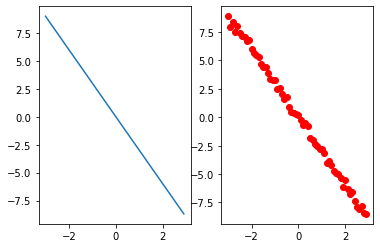

In [31]:
import torch
import matplotlib.pyplot as plt

w = torch.tensor(-10.0, requires_grad=True) # weight, bc requires_grad=True, torch wd be able to change it
print("-1. w: {}".format(w))
x = torch.arange(-3,3,0.1).view(-1,1) # init x range
f = -3 * x # function

y = f + 0.25 * torch.randn(x.size()) # add some noise

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x.numpy(), f.numpy())
ax2.plot(x.numpy(), y.numpy(), 'ro')

In [32]:
def forward(x):
    return x * w

def find_cost(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

learning_rate = 0.1

weight_to_loss = {}
for epoch in range(50):
    y_hat = forward(x)
    cost = find_cost(y_hat, y)
    cost.backward() # derivative, in respect to all variables in cost function
    # w.grad # derivative at point

    w.data = w.data - learning_rate * w.data # move pint in the gradient
    w.grad.data.zero_()
    weight_to_loss[w.item()] = cost.item()

weight_to_loss

{-9.0: 147.36265563964844,
 -8.100000381469727: 108.30998992919922,
 -7.2900004386901855: 78.29544067382812,
 -6.561000347137451: 55.439945220947266,
 -5.904900550842285: 38.2376594543457,
 -5.31441068649292: 25.483417510986328,
 -4.7829694747924805: 16.214115142822266,
 -4.304672718048096: 9.661455154418945,
 -3.8742053508758545: 5.213733196258545,
 -3.4867849349975586: 2.3850131034851074,
 -3.138106346130371: 0.7902935743331909,
 -2.82429575920105: 0.12545879185199738,
 -2.5418663024902344: 0.1511426568031311,
 -2.287679672241211: 0.6797260642051697,
 -2.0589118003845215: 1.5648804903030396,
 -1.8530206680297852: 2.6931569576263428,
 -1.6677186489105225: 3.9772324562072754,
 -1.5009467601776123: 5.35048770904541,
 -1.350852131843567: 6.7626633644104,
 -1.2157669067382812: 8.176380157470703,
 -1.094190239906311: 9.564361572265625,
 -0.984771192073822: 10.907208442687988,
 -0.8862940669059753: 12.191638946533203,
 -0.7976646423339844: 13.409078598022461,
 -0.7178981900215149: 14.554553

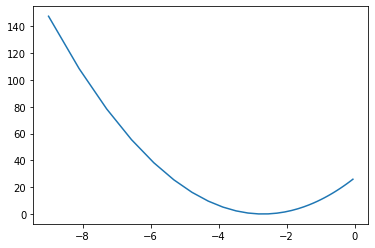

In [33]:
plt.plot(weight_to_loss.keys(), weight_to_loss.values())
plt.show()